In [ ]:
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 9.8 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import numpy as np
import os
cwd = os.getcwd()
from PIL import Image
import time
import copy
import random
import cv2
import re
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import zipfile
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Defective.zip'

# # Directory to extract the zip file
extracted_folder_path = '/content/drive/MyDrive/Positive'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Fix the error by removing os.path()
crack_images = os.listdir(os.path.join(extracted_folder_path, 'Defective'))
print("Number of Crack Images: ", len(crack_images))


Number of Crack Images:  20356


In [ ]:
import zipfile
# Path to the zip file in Google Drive
zip_file_path2 = '/content/drive/MyDrive/Non_Defective.zip'

# # Directory to extract the zip file
extracted_folder_path2 = '/content/drive/MyDrive/Negative'

# Extract the zip file
with zipfile.ZipFile(zip_file_path2, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path2)

# List the files in the extracted folder

no_crack_images = os.listdir(os.path.join(extracted_folder_path2, 'Non_Defective'))
print("Number of Non-Crack Images: ", len(no_crack_images))


Number of Non-Crack Images:  22979


*****************Random Images with Cracks**************************


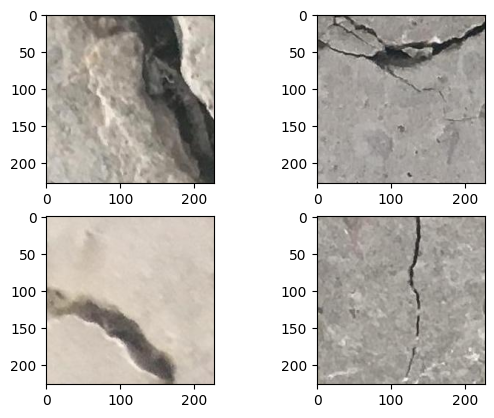

In [ ]:
random_indices = np.random.randint(0, len(crack_images), size=4)
print("*****************Random Images with Cracks**************************")
random_images = np.array(crack_images)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
for i in range(4):
    axarr[i//2,i%2].imshow(mpimg.imread(os.path.join(extracted_folder_path, 'Defective', random_images[i])))
plt.show()


*****************Random Images without Cracks**************************


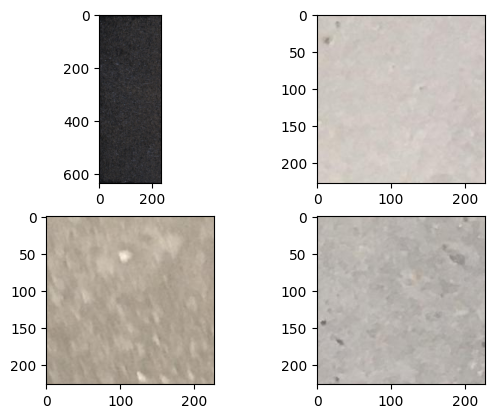

In [ ]:
random_indices2 = np.random.randint(0, len(no_crack_images), size=4)
print("*****************Random Images without Cracks**************************")
random_images2 = np.array(no_crack_images)[random_indices2.astype(int)]

f, axarr = plt.subplots(2,2)
for i in range(4):
    axarr[i//2,i%2].imshow(mpimg.imread(os.path.join(extracted_folder_path2, 'Non_Defective', random_images2[i])))
plt.show()



In [ ]:
import os
import random
import shutil

def create_train_val_folders(src_path, dst_path, train_size, test_size):
    os.makedirs(os.path.join(dst_path, 'train_set'), exist_ok=True)
    os.makedirs(os.path.join(dst_path, 'val_set'), exist_ok=True)

    for class_folder in os.listdir(src_path):
        class_path = os.path.join(src_path, class_folder)
        files = os.listdir(class_path)
        random.shuffle(files)
        train_files = files[:train_size]  # Train files
        val_files = files[train_size:train_size + test_size]  # Validation files

        train_class_path = os.path.join(dst_path, 'train_set', class_folder)
        val_class_path = os.path.join(dst_path, 'val_set', class_folder)
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(val_class_path, exist_ok=True)

        for file in train_files:
            shutil.move(os.path.join(class_path, file), os.path.join(train_class_path, file))
        for file in val_files:
            shutil.move(os.path.join(class_path, file), os.path.join(val_class_path, file))

# Original dataset paths
extracted_folder_path = '/content/drive/MyDrive/Positive'
crack_images = os.listdir(os.path.join(extracted_folder_path, 'Defective'))
print("Number of Crack Images: ", len(crack_images))

extracted_folder_path2 = '/content/drive/MyDrive/Negative'
no_crack_images = os.listdir(os.path.join(extracted_folder_path2, 'Non_Defective'))
print("Number of Non-Crack Images: ", len(no_crack_images))

# Define train and test sizes for each class
defective_train_size = int(0.8 * len(crack_images))
non_defective_train_size = int(0.8 * len(no_crack_images))

defective_test_size = len(crack_images) - defective_train_size
non_defective_test_size = len(no_crack_images) - non_defective_train_size

# Create Train and Val Data sets
base_dir = '/content/drive/MyDrive'

create_train_val_folders(extracted_folder_path, base_dir, defective_train_size, defective_test_size)
create_train_val_folders(extracted_folder_path2, base_dir, non_defective_train_size, non_defective_test_size)


Number of Crack Images:  20356
Number of Non-Crack Images:  22979


cuda
Train Dataset size:  34667
Class Names:  ['Defective', 'Non_Defective']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


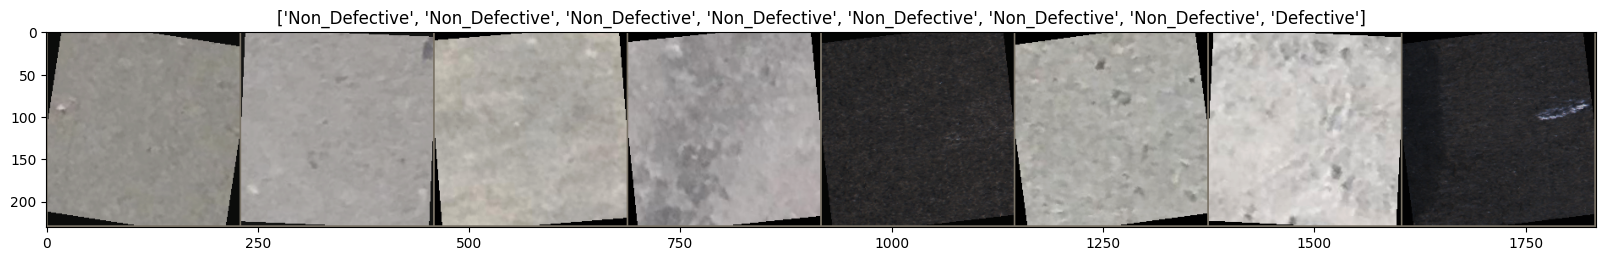

In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Compute mean and standard deviation for the dataset
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

# Define data augmentation and transforms
chosen_transforms = {
    'train_set': transforms.Compose([
        transforms.Resize((256, 256)),  # Resize input images to a size larger than the required crop size
        transforms.RandomCrop(size=227),
        transforms.RandomRotation(degrees=10),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
    ]),
    'val_set': transforms.Compose([
        transforms.Resize((256, 256)),  # Resize input images to a size larger than the required crop size
        transforms.CenterCrop(227),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
    ])
}


# Define the data loader
def load_dataset(format, batch_size):
    data_path = os.path.join('/content/drive/MyDrive', format)
    dataset = datasets.ImageFolder(
        root=data_path,
        transform=chosen_transforms[format]
    )
    data_loader = DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=4,
        shuffle=True
    )
    return data_loader, len(dataset), dataset.classes

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Load train dataset
train_loader, train_size, class_names = load_dataset('train_set', 8)
print("Train Dataset size: ", train_size)
print("Class Names: ", class_names)

# Visualize the augmented dataset
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(mean_nums)
    std = np.array(std_nums)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Grab some of the training data to visualize
inputs, classes = next(iter(train_loader))
out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(20, 10))
imshow(out, title=[class_names[x] for x in classes])


In [ ]:
import torch.nn as nn
import torchvision.models as models
from torchsummary import summary

# Load pretrained ResNet-34 model
resnet34 = models.resnet34(pretrained=True)

# Freeze model parameters
for param in resnet34.parameters():
    param.requires_grad = False

## Change the final layer of the resnet model
# Change the final layer of ResNet-34 Model for Transfer Learning
fc_inputs = resnet34.fc.in_features

resnet34.fc = nn.Sequential(
    nn.Linear(fc_inputs, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)  # Adjust the output size according to your task
)

# Convert model to be used on GPU
resnet34 = resnet34.to(device)

print(summary(resnet34, (3, 227, 227)))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 79.8MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 114, 114]           9,408
       BatchNorm2d-2         [-1, 64, 114, 114]             128
              ReLU-3         [-1, 64, 114, 114]               0
         MaxPool2d-4           [-1, 64, 57, 57]               0
            Conv2d-5           [-1, 64, 57, 57]          36,864
       BatchNorm2d-6           [-1, 64, 57, 57]             128
              ReLU-7           [-1, 64, 57, 57]               0
            Conv2d-8           [-1, 64, 57, 57]          36,864
       BatchNorm2d-9           [-1, 64, 57, 57]             128
             ReLU-10           [-1, 64, 57, 57]               0
       BasicBlock-11           [-1, 64, 57, 57]               0
           Conv2d-12           [-1, 64, 57, 57]          36,864
      BatchNorm2d-13           [-1, 64, 57, 57]             128
             ReLU-14           [-1, 64,

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler

# Define Optimizer and Loss Function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet34.parameters())  # Change to resnet34
# optimizer = optim.SGD(resnet34.fc.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 3 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Load dataset and define batch size
batch_size = 8
train_loader, train_size, class_names = load_dataset('train_set', batch_size)  # Change 'train_set' to 'training'
val_loader, val_size, _ = load_dataset('val_set', batch_size)  # Change 'val_set' to 'validation'
dataset_sizes = {'train_set': train_size, 'val_set': val_size}  # Change 'train_set' to 'training' and 'val_set' to 'validation'
dataloaders = {'train_set': train_loader, 'val_set': val_loader}  # Change 'train_set' to 'training' and 'val_set' to 'validation'
idx_to_class = {0: 'Non_Defective', 1: 'Defective'}  # Modified Positive to Defective



Epoch 0/9
----------
Iterating through data...


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


trainings Loss: 0.2474 Acc: 0.9020
Iterating through data...
validations Loss: 0.0876 Acc: 0.9722

Epoch 1/9
----------
Iterating through data...
trainings Loss: 0.2046 Acc: 0.9234
Iterating through data...
validations Loss: 0.0787 Acc: 0.9744

Epoch 2/9
----------
Iterating through data...
trainings Loss: 0.1696 Acc: 0.9365
Iterating through data...
validations Loss: 0.0650 Acc: 0.9773

Epoch 3/9
----------
Iterating through data...
trainings Loss: 0.1676 Acc: 0.9376
Iterating through data...
validations Loss: 0.0656 Acc: 0.9784

Epoch 4/9
----------
Iterating through data...
trainings Loss: 0.1640 Acc: 0.9390
Iterating through data...
validations Loss: 0.0613 Acc: 0.9800

Epoch 5/9
----------
Iterating through data...
trainings Loss: 0.1651 Acc: 0.9401
Iterating through data...
validations Loss: 0.0605 Acc: 0.9796

Epoch 6/9
----------
Iterating through data...
trainings Loss: 0.1587 Acc: 0.9412
Iterating through data...
validations Loss: 0.0607 Acc: 0.9788

Epoch 7/9
----------
Iter

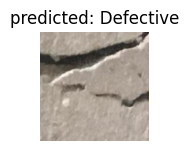

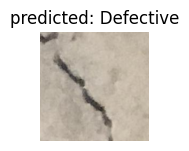

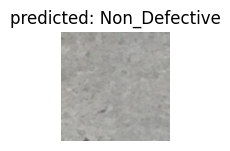

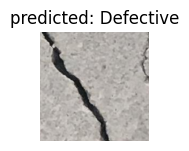

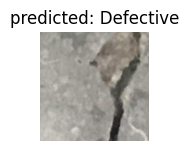

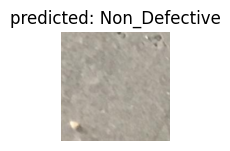

In [ ]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train_set', 'val_set']:
            if phase == 'train_set':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            current_loss = 0.0
            current_corrects = 0

            # Here's where the training happens
            print('Iterating through data...')
            # training starts...
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # We need to zero the gradients, don't forget it
                optimizer.zero_grad()
                # Time to carry out the forward training pass
                # We only need to log the loss stats if we are in the training phase
                with torch.set_grad_enabled(phase == 'train_set'):
                    outputs = model(inputs)
                    # this computes the class that the model belongs to...
                    _, preds = torch.max(outputs, 1)
                    # compute the loss here...
                    # we compute the difference between the true label and the predicted output...
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train_set':
                        loss.backward()  # this is the back-propagation step.
                        # We minimize our model loss and optimize the model in this phase
                        optimizer.step()
                        # optimizer updates the model parameters...

                # We want variables to hold the loss statistics
                # combine our model losses and compute the wrongly classified examples
                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)
            # compute the loss and accuracy for each of our epoch
            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == 'val_set' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_handled = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val_set']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handled += 1
                ax = plt.subplot(num_images//2, 2, images_handled)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_handled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# Train the model
base_model = train_model(resnet34, criterion, optimizer, exp_lr_scheduler, num_epochs=10)

# Visualize the results
visualize_model(base_model)
plt.show()


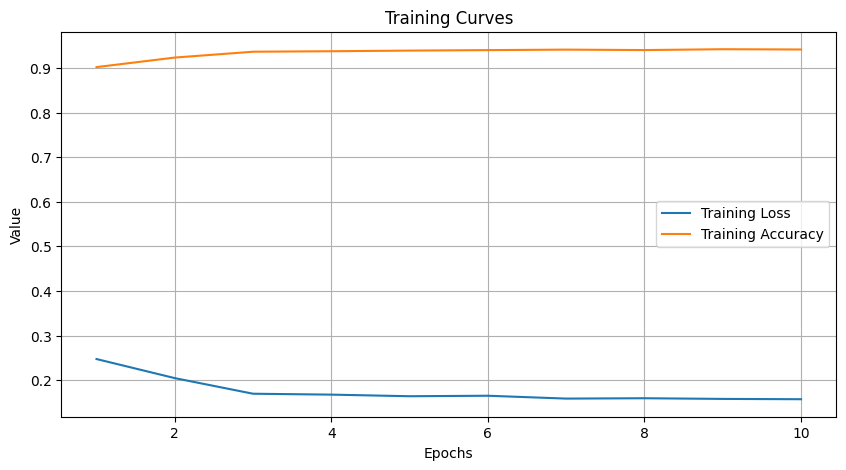

In [ ]:
import matplotlib.pyplot as plt

# Training loss and accuracy data obtained during training
train_loss = [0.2474, 0.2046, 0.1696, 0.1676, 0.1640, 0.1651, 0.1587, 0.1595, 0.1580, 0.1573]
train_acc = [0.9020, 0.9234, 0.9365, 0.9376, 0.9390, 0.9401, 0.9412, 0.9402, 0.9421, 0.9415]

# Define a function to plot training curves
def plot_training_curves(train_loss, train_acc):
    plt.figure(figsize=(10, 5))
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, train_acc, label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Training Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the training curves
plot_training_curves(train_loss, train_acc)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


cuda


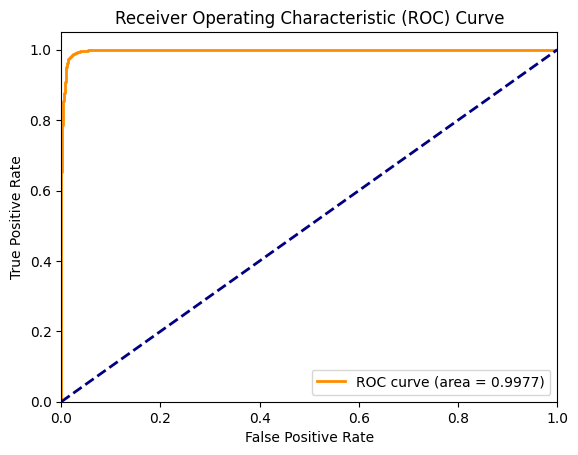

Confusion Matrix:
[[3945  127]
 [  32 4564]]
Sensitivity: 0.9930374238468234
Specificity: 0.968811394891945
Precision: 0.972926881261991
Recall: 0.9930374238468234
F1 Score: 0.9828792936362658


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support

# Define the directory where you want to save the model
save_dir = '/content/drive/MyDrive/trained_models'

# Define the path where you want to save the model
save_path = os.path.join(save_dir, 'resnet34.pth')

# Define data augmentation and transforms
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

chosen_transforms = {
    'train_set': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomCrop(size=227),
        transforms.RandomRotation(degrees=10),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
    ]),
    'val_set': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(227),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
    ])
}

# Define the data loader
def load_dataset(format, batch_size):
    data_path = os.path.join('/content/drive/MyDrive', format)
    dataset = datasets.ImageFolder(
        root=data_path,
        transform=chosen_transforms[format]
    )
    data_loader = DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=4,
        shuffle=True
    )
    return data_loader, len(dataset), dataset.classes

# Define the validation data loader
val_loader, val_size, _ = load_dataset('val_set', 8)

# Load the saved model
model = models.resnet34(pretrained=False)
fc_inputs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.load_state_dict(torch.load(save_path, map_location=device))

# Move the model to the appropriate device
model = model.to(device)

model.eval()

# Evaluate the model on validation set
y_true = []
y_scores = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_scores.extend(torch.softmax(outputs, dim=1)[:, 1].cpu().numpy())

# Convert y_scores to numpy array
y_scores = np.array(y_scores)

# Calculate precision, recall, F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_scores > 0.5, average='binary')

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Calculate confusion matrix
y_pred = np.array([1 if score >= 0.5 else 0 for score in y_scores])
cm = confusion_matrix(y_true, y_pred)

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print metrics
print('Confusion Matrix:')
print(cm)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


In [ ]:
print("Confusion Matrix:")
print("\t\tPredicted Positive\tPredicted Negative")
print("Actual Positive\t", cm[1, 1], "\t\t\t", cm[1, 0])
print("Actual Negative\t", cm[0, 1], "\t\t\t", cm[0, 0])

Confusion Matrix:
		Predicted Positive	Predicted Negative
Actual Positive	 4564 			 32
Actual Negative	 127 			 3945


Save and load the model later


In [ ]:
import os
import torch
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory where you want to save the model
save_dir = '/content/drive/MyDrive/trained_models'
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Define the path where you want to save the model
save_path = os.path.join(save_dir, 'resnet34.pth')

# Save the trained model
torch.save(base_model.state_dict(), save_path)

print("Model saved successfully at:", save_path)


In [ ]:
import os

# Path to the validation folder
val_folder_path = '/content/drive/MyDrive/val_set'

# List contents of the val folder for Defective class
defective_val_path = os.path.join(val_folder_path, 'Defective')
defective_files = os.listdir(defective_val_path)
print("No of Defective class files in validation folder:", len(defective_files))

# List contents of the val folder for Non_Defective class
non_defective_val_path = os.path.join(val_folder_path, 'Non_Defective')
non_defective_files = os.listdir(non_defective_val_path)
print("No of Non_Defective class files in validation folder:", len(non_defective_files))


No of Defective class files in validation folder: 4072
No of Non_Defective class files in validation folder: 4596


In [ ]:
import os

# Path to the train folder
train_folder_path = '/content/drive/MyDrive/train_set'

# List contents of the train folder for Defective class
defective_train_path = os.path.join(train_folder_path, 'Defective')
defective_files_train = os.listdir(defective_train_path)
print("No of Defective class files in train folder:", len(defective_files_train))

# List contents of the train folder for Non_Defective class
non_defective_train_path = os.path.join(train_folder_path, 'Non_Defective')
non_defective_files_train = os.listdir(non_defective_train_path)
print("No of Non_Defective class files in train folder:", len(non_defective_files_train))


No of Defective class files in train folder: 16284
No of Non_Defective class files in train folder: 18383


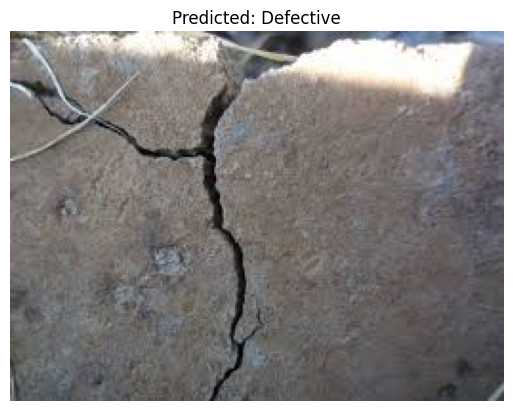

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation to be applied to the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize input images to a size larger than the required crop size
    transforms.CenterCrop(227),     # Crop the center region of the resized image
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean_nums, std_nums)  # Normalize the image
])

# Load the saved model
model = models.resnet34()
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load(save_path))
model.eval()

# Load an image from the dataset
image_path = 'images.jpeg'
image = Image.open(image_path)

# Apply transformation to the image
input_tensor = transform(image).unsqueeze(0)

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# Display the image and prediction
plt.imshow(image)
plt.title('Predicted: {}'.format(class_names[predicted.item()]))
plt.axis('off')
plt.show()


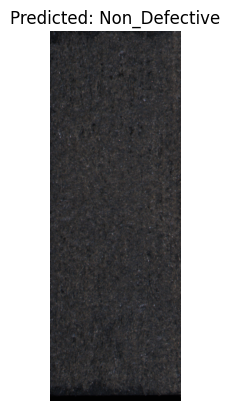

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation to be applied to the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize input images to a size larger than the required crop size
    transforms.CenterCrop(227),     # Crop the center region of the resized image
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean_nums, std_nums)  # Normalize the image
])

# Load the saved model
model = models.resnet34()
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load(save_path))
model.eval()

# Load an image from the dataset
image_path = '20091.png'
image = Image.open(image_path)

# Apply transformation to the image
input_tensor = transform(image).unsqueeze(0)

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# Display the image and prediction
plt.imshow(image)
plt.title('Predicted: {}'.format(class_names[predicted.item()]))
plt.axis('off')
plt.show()


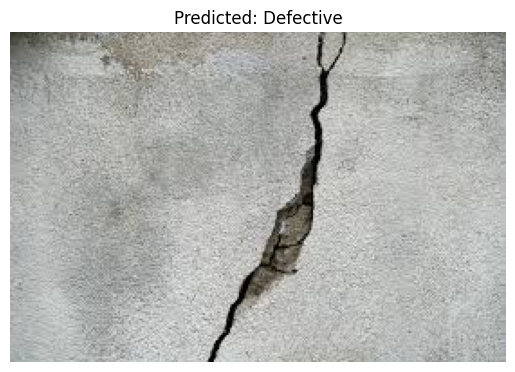

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation to be applied to the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize input images to a size larger than the required crop size
    transforms.CenterCrop(227),     # Crop the center region of the resized image
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean_nums, std_nums)  # Normalize the image
])

# Load the saved model
model = models.resnet34()
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load(save_path))
model.eval()

# Load an image from the dataset
image_path = 'images (2).jpeg'
image = Image.open(image_path)

# Apply transformation to the image
input_tensor = transform(image).unsqueeze(0)

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# Display the image and prediction
plt.imshow(image)
plt.title('Predicted: {}'.format(class_names[predicted.item()]))
plt.axis('off')
plt.show()
